In [158]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.layers import Dense, Activation, CuDNNLSTM, LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import glob
import pandas as pd
import numpy as np

In [159]:
df = pd.read_csv(r'C:\Users\Jay Thummar\Desktop\train_dataframes.csv')
df = df[:2400]

In [160]:
df.drop(['week_X-2', 'week_X-3', 'week_X-4', 'MA_X-4', 'dayOfWeek',
        'weekend', 'holiday', 'Holiday_ID','datetime'], axis=1, inplace=True)
df.head(20)

,hourOfDay,T2M_toc,DEMAND
0,1,25.308496,954.2018
1,2,25.141443,913.8660
2,3,25.006738,903.3637
3,4,24.899713,889.0806
4,5,24.821558,910.1472
5,6,24.830194,922.1737
6,7,25.799951,939.9442
7,8,26.980310,1077.8575
8,9,28.031824,1179.6601
9,10,28.906061,1255.1569


In [161]:
X = []
Y = []

In [162]:
for i in range(0, df.shape[0]-24*7):
    X.append(df.iloc[i:i+(24*7)]['DEMAND'])
    Y.append(df.iloc[i+(24*7)]['DEMAND'])

In [163]:
x, y = np.array(X), np.array(Y)
y = np.reshape(y, (len(y), 1))

# x = np.delete(x, list(range(1, x.shape[1], 2)), axis=1)
x = np.delete(x, list(range(1, x.shape[0], 2)), axis=0)

y = np.delete(y, list(range(1, y.shape[0], 2)), axis=0)

In [164]:
x.shape

(1116, 168)

In [165]:
y.shape

(1116, 1)

In [166]:
x

array([[ 954.2018,  913.866 ,  903.3637, ..., 1069.1463, 1024.2274,
         963.816 ],
       [ 903.3637,  889.0806,  910.1472, ...,  963.816 ,  918.182 ,
         892.3819],
       [ 910.1472,  922.1737,  939.9442, ...,  892.3819,  877.2844,
         862.8613],
       ...,
       [1103.883 , 1089.056 , 1068.4377, ..., 1082.095 , 1054.5086,
        1093.4606],
       [1068.4377, 1015.142 ,  962.3642, ..., 1093.4606, 1165.7298,
        1179.6642],
       [ 962.3642,  916.7613,  889.4607, ..., 1179.6642, 1169.6609,
        1130.1839]])

In [167]:
y

array([[ 918.182 ],
       [ 877.2844],
       [ 847.2567],
       ...,
       [1165.7298],
       [1169.6609],
       [1056.758 ]])

In [168]:
from sklearn.model_selection import train_test_split

In [169]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [170]:
from sklearn.linear_model import LinearRegression

In [171]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [172]:
y_pred = model.predict(x_test)
y_pred

array([1264.22336236,  947.89729298,  990.82312815,  986.324669  ,
       1071.83700455,  932.49680671,  894.93589425,  809.80315884,
       1097.41940307, 1087.66622931, 1054.74180823, 1124.38518451,
        786.25578805, 1159.57795109, 1164.08966381, 1233.90871431,
        949.30351216,  934.38863441, 1391.13810814, 1419.93001726,
        847.57514135,  900.25190187, 1294.83889617,  914.98697056,
       1408.42981051, 1042.80920273,  945.38300744,  932.84930933,
       1309.77263845, 1047.96976518, 1110.96137756,  901.07499029,
        881.74738126,  927.07807994, 1494.05347047,  871.56665946,
        904.84738595,  944.67774342, 1025.69963995, 1049.28162897,
       1085.20484734,  907.41483131, 1074.50076793,  999.86177556,
       1253.9669063 ,  883.65887494,  909.47916514, 1436.49945184,
       1494.14732949, 1396.82897094,  971.84301169,  956.68181785,
       1096.04008748,  983.73135946, 1384.42481799, 1422.98916367,
        826.23762251,  992.27863672, 1412.24835623, 1001.81262

In [173]:
from sklearn.metrics import r2_score

In [174]:
r2_score(y_test,y_pred)

0.9788940216722682

Text(0.5, 1.0, 'Actual vs Predicted')

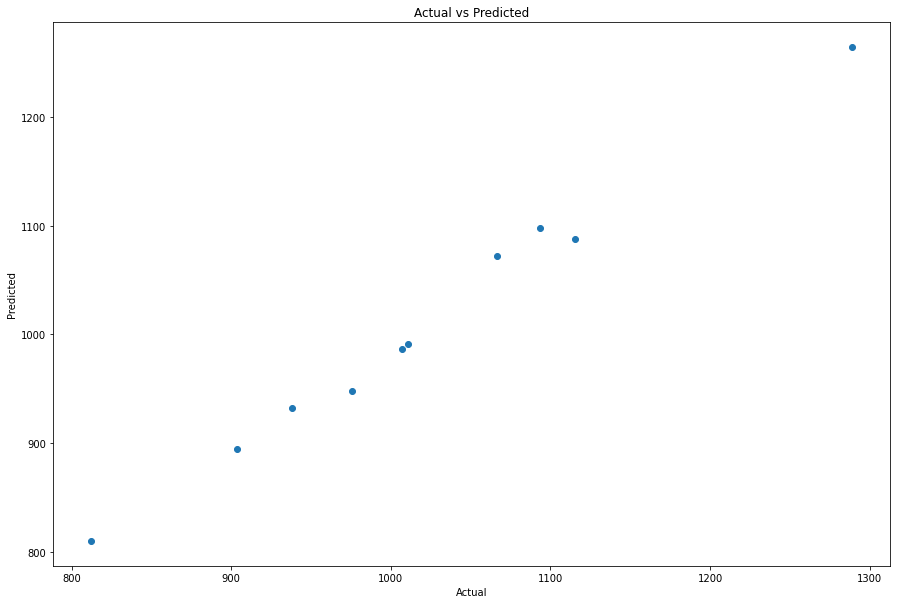

In [175]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.scatter(y_test[:10],y_pred[:10])
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')

In [176]:
pred_y_df = pd.DataFrame({'Actual Values':y_test,'Predicted_values':y_pred,'Difference':y_test-y_pred})
pred_y_df

,Actual Values,Predicted_values,Difference
0,1289.1745,1264.223362,24.951138
1,975.4831,947.897293,27.585807
2,1010.4936,990.823128,19.670472
3,1007.0713,986.324669,20.746631
4,1066.5101,1071.837005,-5.326905
...,...,...,...
442,1382.6206,1398.464861,-15.844261
443,1036.4109,1049.443109,-13.032209
444,946.7805,952.423257,-5.642757
445,991.1953,968.481836,22.713464


In [177]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [179]:
mean_absolute_percentage_error(pred_y_df['Actual Values'],pred_y_df['Predicted_values'])

1.85

In [180]:
100-1.85

98.15

In [181]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred_y_df['Actual Values'],pred_y_df['Predicted_values']))
rmse

28.08664597987065